<a href="https://colab.research.google.com/github/Wipada6430205202/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

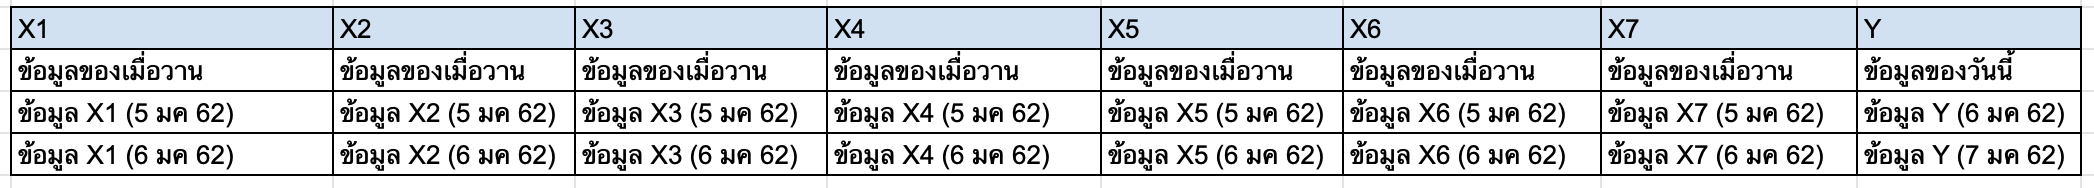

#นำข้อมูลเข้า


In [445]:
import pandas as pd
import os
import numpy as np

In [446]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [447]:
os.chdir('/content/drive/MyDrive/BSC_DPDM23/อุตุ')
!pwd

/content/drive/.shortcut-targets-by-id/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4/อุตุ


In [448]:
!ls

'ความกด(เปอร์เซ็นต์)'	 'ความเร็วลม(นอต)'   'ปริมาณฝน(มิลลิเมตร)'	     'อุณหภูมิต่ำสุด(เซลเซียส)'
'ความชื้นสัมพัทธ์(เปอร์เซ็นต์)'  'จำนวนเมฆ(10ส่วน)'  'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'  'อุณหภูมิตุ้มแห้ง(เซลเซียส)'


#เตรียมข้อมูล

จากโฟลเดอร์อุตุนิยมวิทยา

ความกดอากาศ (%) = pressure

ความชื้นสัมพัทธ์ (%) = humidity

ความเร็วลม (นอต) = wind

 จำนวนเมฆ (10 ส่วน) = clouds

 ปริมาณฝน (มิลิเมตร) = rainfall

 อุณหภูมิจุดน้ำค้าง (เซลเซียส) = dewpoint

อุณหภูมิตุ้มแห้ง (เซลเซียส) = drybulb

อุณหภูมิต่ำสุด (เซลเซียส) = minimum degree


จังหวัด

1. ขอนแก่น (Khon Kaen) = KK

2. นครพนม (Nakhon Phanom) = NP

3. สกลนคร (Sakon Nakhon) = SN

4. หนองคาย (Nong Khai) = NK

5. เลย (Loei) = LEI

#Pressure(%)

##ขอนแก่น (kk)

In [375]:
kk_pressure =  pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header = 4)
kk_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


###เปลี่ยนชื่อ column

In [376]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}

In [377]:
kk_pressure = kk_pressure.rename(columns=column_name)
kk_pressure.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


###ตรวจสอบและแก้ไขค่า missing

In [378]:
#ตรวจสอบค่า missing
kk_pressure = kk_pressure.replace('-',np.NaN)
kk_pressure.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [379]:
for i in range(len(kk_pressure['ที่'])):kk_pressure.iloc[i,:]=kk_pressure.iloc[i,:].fillna(kk_pressure.iloc[i]['ค่าเฉลี่ย'])

In [380]:
kk_pressure.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##นครพนม(np)

In [123]:
np_pressure =  pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header = 4)
np_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000


###เปลี่ยนชื่อ column

In [124]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}

In [125]:
np_pressure =np_pressure.rename(columns=column_name)
np_pressure.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000


###ตรวจสอบค่าและแก้ไขค่า missing

In [126]:
#ตรวจสอบค่า missing
np_pressure = np_pressure.replace('-',np.NaN)
np_pressure.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [127]:
for i in range(len(np_pressure['ที่'])):np_pressure.iloc[i,:]=np_pressure.iloc[i,:].fillna(np_pressure.iloc[i]['ค่าเฉลี่ย'])

In [128]:
np_pressure.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##สกลนคร (sn)

In [129]:
sn_pressure =  pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header = 4)
sn_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000


###เปลี่ยนชื่อ column

In [130]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}

In [131]:
sn_pressure =sn_pressure.rename(columns=column_name)
sn_pressure.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000


###ตรวจสอบค่าและแก้ไขค่า missing

In [132]:
#ตรวจสอบค่า missing
sn_pressure = sn_pressure.replace('-',np.NaN)
sn_pressure.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [133]:
for i in range(len(sn_pressure['ที่'])):sn_pressure.iloc[i,:]=sn_pressure.iloc[i,:].fillna(sn_pressure.iloc[i]['ค่าเฉลี่ย'])

In [134]:
sn_pressure.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##หนองคาย (nk)

In [135]:
nk_pressure =  pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header = 4)
nk_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667


###เปลี่ยนชื่อ column

In [136]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}

In [137]:
nk_pressure =nk_pressure.rename(columns=column_name)
nk_pressure.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667


###ตรวจสอบค่าและแก้ไขค่า missing

In [138]:
#ตรวจสอบค่า missing
nk_pressure = nk_pressure.replace('-',np.NaN)
nk_pressure.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [139]:
for i in range(len(nk_pressure['ที่'])):nk_pressure.iloc[i,:]=nk_pressure.iloc[i,:].fillna(nk_pressure.iloc[i]['ค่าเฉลี่ย'])

In [140]:
nk_pressure.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##เลย (L)

In [141]:
l_pressure =  pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',header = 4)
l_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667


###เปลี่ยนชื่อ column

In [142]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}

In [143]:
l_pressure =l_pressure.rename(columns=column_name)
l_pressure.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667


###ตรวจสอบค่าและแก้ไขค่า missing

In [144]:
#ตรวจสอบค่า missing
l_pressure = l_pressure.replace('-',np.NaN)
l_pressure.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [145]:
for i in range(len(l_pressure['ที่'])):l_pressure.iloc[i,:]=l_pressure.iloc[i,:].fillna(l_pressure.iloc[i]['ค่าเฉลี่ย'])

In [146]:
l_pressure.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

#Humidity(%)

##ขอนแก่น (kk)

In [147]:
kk_humidity =  pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header = 4)
kk_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


###เปลี่ยนชื่อ column

In [148]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
kk_humidity =kk_humidity.rename(columns=column_name)
kk_humidity.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


###ตรวจสอบและแก้ไขค่า missing

In [149]:
#ตรวจสอบค่า missing
kk_humidity =kk_humidity.replace('-',np.NaN)
kk_humidity.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [150]:
for i in range(len(kk_humidity['ที่'])):kk_humidity.iloc[i,:]=kk_humidity.iloc[i,:].fillna(kk_humidity.iloc[i]['ค่าเฉลี่ย'])
kk_humidity.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##นครพนม(np)

In [151]:
np_humidity =  pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header = 4)
np_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72,70,69,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66,65,-,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63,66,70,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61,59,62,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69,-,-,65


###เปลี่ยนชื่อ column

In [152]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
np_humidity =np_humidity.rename(columns=column_name)
np_humidity.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72,70,69,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66,65,-,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63,66,70,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61,59,62,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69,-,-,65


###ตรวจสอบค่าและแก้ไขค่า missing

In [153]:
#ตรวจสอบค่า missing
np_humidity= np_humidity.replace('-',np.NaN)
np_humidity.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [154]:
for i in range(len(np_humidity['ที่'])):np_humidity.iloc[i,:]=np_humidity.iloc[i,:].fillna(np_humidity.iloc[i]['ค่าเฉลี่ย'])
np_humidity.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##สกลนคร (sn)

In [155]:
sn_humidity =  pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header = 4)
sn_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74,73,72,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69,69,-,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69,69,68,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64,64,62,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71,-,-,64


###เปลี่ยนชื่อ column

In [156]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
sn_humidity =sn_humidity.rename(columns=column_name)
sn_humidity.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74,73,72,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69,69,-,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69,69,68,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64,64,62,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71,-,-,64


###ตรวจสอบค่าและแก้ไขค่า missing

In [157]:
#ตรวจสอบค่า missing
sn_humidity = sn_humidity.replace('-',np.NaN)
sn_humidity.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [158]:
for i in range(len(sn_humidity['ที่'])):sn_humidity.iloc[i,:]=sn_humidity.iloc[i,:].fillna(sn_humidity.iloc[i]['ค่าเฉลี่ย'])
sn_humidity.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##หนองคาย (nk)

In [159]:
nk_humidity=  pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header = 4)
nk_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70,66,68,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71,69,-,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70,67,68,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65,68,73,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69,-,-,69


###เปลี่ยนชื่อ column

In [160]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
nk_humidity=nk_humidity.rename(columns=column_name)
nk_humidity.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70,66,68,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71,69,-,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70,67,68,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65,68,73,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69,-,-,69


###ตรวจสอบค่าและแก้ไขค่า missing

In [161]:
#ตรวจสอบค่า missing
nk_humidity = nk_humidity.replace('-',np.NaN)
nk_humidity.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [162]:
for i in range(len(nk_humidity['ที่'])):nk_humidity.iloc[i,:]=nk_humidity.iloc[i,:].fillna(nk_humidity.iloc[i]['ค่าเฉลี่ย'])
nk_humidity.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##เลย (L)

In [163]:
l_humidity =  pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header = 4)
l_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


###เปลี่ยนชื่อ column

In [165]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
l_humidity =l_humidity.rename(columns=column_name)
l_humidity.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


###ตรวจสอบค่าและแก้ไขค่า missing

In [166]:
#ตรวจสอบค่า missing
l_humidity = l_humidity.replace('-',np.NaN)
l_humidity.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [167]:
for i in range(len(l_humidity['ที่'])):l_humidity.iloc[i,:]=l_humidity.iloc[i,:].fillna(l_humidity.iloc[i]['ค่าเฉลี่ย'])
l_humidity.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

#Wind

In [178]:
#เรียกข้อมูล 5 จังหวัด
kk_wind = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',header = 4)
np_wind = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',header = 4)
sn_wind = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',header = 4)
nk_wind = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',header = 4)
l_wind = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx',header = 4)

##ขอนแก่น (kk)

In [179]:
kk_wind.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


In [180]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
kk_wind =kk_wind.rename(columns=column_name)
kk_wind.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


In [181]:
#ตรวจสอบค่า missing
kk_wind = kk_wind.replace('-',np.NaN)
kk_wind.isnull().any()


ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3                True
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21               True
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [182]:
#แก้ไขค่า missing
for i in range(len(kk_wind['ที่'])):kk_wind.iloc[i,:]=kk_wind.iloc[i,:].fillna(kk_wind.iloc[i]['ค่าเฉลี่ย'])
kk_wind.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##นครพนม(np)

In [183]:
np_wind.head()

#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
np_wind =np_wind.rename(columns=column_name)
np_wind.head()


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,2,3,3,...,4,1,5,1,1,1,4,5,4,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0,0,1,1,...,1,2,2,3,3,3,1,2,-,2.200000


In [184]:
#ตรวจสอบค่า missing
np_wind = np_wind.replace('-',np.NaN)
np_wind.isnull().any()


ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4                True
5                True
6               False
7                True
8                True
9               False
10               True
11               True
12               True
13              False
14              False
15               True
16               True
17              False
18               True
19              False
20               True
21               True
22               True
23              False
24               True
25               True
26              False
27              False
28               True
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [185]:
#แก้ไขค่า missing
for i in range(len(np_wind['ที่'])):np_wind.iloc[i,:]=np_wind.iloc[i,:].fillna(np_wind.iloc[i]['ค่าเฉลี่ย'])
np_wind.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##สกลนคร (sn)

In [186]:
sn_wind.head()

#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
sn_wind =sn_wind.rename(columns=column_name)
sn_wind.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


In [187]:
#ตรวจสอบค่า missing
sn_wind =sn_wind.replace('-',np.NaN)
sn_wind.isnull().any()


ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4                True
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20               True
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [188]:
#แก้ไขค่า missing
for i in range(len(sn_wind['ที่'])):sn_wind.iloc[i,:]=sn_wind.iloc[i,:].fillna(sn_wind.iloc[i]['ค่าเฉลี่ย'])
sn_wind.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##หนองคาย (nk)





In [189]:
nk_wind.head()

#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
nk_wind =nk_wind.rename(columns=column_name)
nk_wind.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2,1,3,1,...,2,2,3,3,3,3,3,3,4,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2,2,1,2,...,7,4,2,3,2,2,2,2,-,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2,2,2,2,...,3,6,5,4,2,2,2,3,2,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


In [190]:
#ตรวจสอบค่า missing
nk_wind =nk_wind.replace('-',np.NaN)
nk_wind.isnull().any()


ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4                True
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [191]:
#แก้ไขค่า missing
for i in range(len(nk_wind['ที่'])):nk_wind.iloc[i,:]=nk_wind.iloc[i,:].fillna(nk_wind.iloc[i]['ค่าเฉลี่ย'])
nk_wind.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##เลย (L)

In [193]:

l_wind.head()

#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
l_wind =l_wind.rename(columns=column_name)
l_wind.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3,2,1,...,1,1,2,2,1,2,2,2,1,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2,2,2,...,3,2,1,1,2,1,2,1,-,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1,2,1,...,1,2,3,2,1,2,1,2,2,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2,2,2,...,2,1,3,2,2,2,2,1,1,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1,2,1,...,1,1,1,1,3,4,2,1,-,1.700000


In [194]:
#ตรวจสอบค่า missing
l_wind =l_wind.replace('-',np.NaN)
l_wind.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5                True
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16               True
17              False
18              False
19               True
20              False
21              False
22              False
23              False
24               True
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [195]:
#แก้ไขค่า missing
for i in range(len(l_wind['ที่'])):l_wind.iloc[i,:]=l_wind.iloc[i,:].fillna(l_wind.iloc[i]['ค่าเฉลี่ย'])
l_wind.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

# Clouds

In [222]:
#เรียกข้อมูล 5 จังหวัด
kk_c = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',header = 4)
np_c = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',header = 4)
sn_c = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',header = 4)
nk_c= pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',header = 4)
l_c= pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',header = 4)

##ขอนแก่น (kk)

In [198]:
kk_c.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2.533333


In [199]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
kk_c =kk_c.rename(columns=column_name)
kk_c.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2.533333


In [200]:
#ตรวจสอบค่า missing
kk_c = kk_c.replace('-',np.NaN)
kk_c.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3                True
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21               True
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [201]:
#แก้ไขค่า missing
for i in range(len(kk_c['ที่'])):kk_c.iloc[i,:]=kk_c.iloc[i,:].fillna(kk_c.iloc[i]['ค่าเฉลี่ย'])
kk_c.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##นครพนม(np)

In [202]:
np_c.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2.966667


In [203]:


#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
np_c =np_c.rename(columns=column_name)
np_c.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2.966667


In [204]:
#ตรวจสอบค่า missing
np_c= np_c.replace('-',np.NaN)
np_c.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11              False
12              False
13               True
14               True
15               True
16              False
17              False
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26              False
27               True
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [205]:
#แก้ไขค่า missing
for i in range(len(np_c['ที่'])):np_c.iloc[i,:]=np_c.iloc[i,:].fillna(np_c.iloc[i]['ค่าเฉลี่ย'])
np_c.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##สกลนคร (sn)

In [210]:
sn_c.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,9,7,7,9,10,8,...,2,1,2,1,1,3,3,1,4,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,0,0,1,3,7,8,...,4,3,1,1,1,1,1,0,-,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,1,2,2,2,6,6,...,3,2,-,0,0,0,0,1,-,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0,0,4,3,2,0,1,...,4,1,0,3,0,1,4,7,8,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4,4,8,5,1,0,0,...,-,-,-,1,6,4,0,0,-,2.142857


In [211]:

#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
sn_c =sn_wind.rename(columns=column_name)
sn_c.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.0,1,0,2,...,1,2,2,1,2,2,1.0,1.0,1.000000,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1.0,1,1,1,...,3,3,2,2,1,1,1.0,1.0,1.200000,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1.0,1,1,1,...,1,3,3,1,2,1,1.0,2.0,2.000000,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,3,2,4,...,5,4,5,3,2,3,3.0,3.0,4.000000,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2.0,1,2,2,...,1,2,1,3,7,5,3.0,2.0,2.733333,2.733333


In [212]:
#ตรวจสอบค่า missing
sn_c=sn_c.replace('-',np.NaN)
sn_c.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [213]:
#แก้ไขค่า missing
for i in range(len(sn_c['ที่'])):sn_c.iloc[i,:]=sn_c.iloc[i,:].fillna(sn_c.iloc[i]['ค่าเฉลี่ย'])
sn_c.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##หนองคาย (nk)

In [214]:
nk_c.head()

#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
nk_c =nk_c.rename(columns=column_name)
nk_c.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,0,0,1,1,2,6,...,6,6,-,0,1,2,4,2,-,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4,4,-,2,7,5,5,...,2,8,1,-,3,1,1,3,-,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,8,2,3,...,8,5,6,6,1,0,6,10,9,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7,8,10,6,1,-,-,...,-,-,-,-,6,5,6,NaN,-,4.928571


In [215]:
#ตรวจสอบค่า missing
nk_c =nk_c.replace('-',np.NaN)
nk_c.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [216]:
#แก้ไขค่า missing
for i in range(len(nk_c['ที่'])):nk_c.iloc[i,:]=nk_c.iloc[i,:].fillna(nk_c.iloc[i]['ค่าเฉลี่ย'])
nk_c.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##เลย (L)

In [223]:
l_c.head()

#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
l_c =l_c.rename(columns=column_name)


In [224]:
l_c.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
#ตรวจสอบค่า missing
l_c =l_c.replace('-',np.NaN)
l_c.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
ค่าเฉลี่ย       False
Unnamed: 35      True
Unnamed: 36      True
Unnamed: 37      True
Unnamed: 38      True
Unnamed: 39      True
Unnamed: 40      True
Unnamed: 41      True
Unnamed: 42      True
Unnamed: 43      True
Unnamed: 44      True
dtype: boo

In [227]:
#แก้ไขค่า missing
for i in range(len(l_c['ที่'])):l_c.iloc[i,:]=l_c.iloc[i,:].fillna(l_c.iloc[i]['ค่าเฉลี่ย'])
l_c.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
Unnamed: 35     False
Unnamed: 36     False
Unnamed: 37     False
Unnamed: 38     False
Unnamed: 39     False
Unnamed: 40     False
Unnamed: 41     False
Unnamed: 42     False
Unnamed: 43     False
Unnamed: 44     False
dtype: boo

#Rainfall

In [206]:
#เรียกข้อมูล 5 จังหวัด
kk_rf = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',header = 4)
np_rf = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',header = 4)
sn_rf = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',header = 4)
nk_rf= pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',header = 4)
l_rf= pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',header = 4)

##ขอนแก่น (kk)

In [228]:
kk_rf.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


In [229]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
kk_rf =kk_rf.rename(columns=column_name)
kk_rf.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


In [230]:
#ตรวจสอบค่า missing
kk_rf = kk_rf.replace('-',np.NaN)
kk_rf.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
ค่าเฉลี่ย        True
dtype: bool

In [231]:
#แก้ไขค่า missing
for i in range(len(kk_rf['ที่'])):kk_rf.iloc[i,:]=kk_rf.iloc[i,:].fillna(kk_rf.iloc[i]['ค่าเฉลี่ย'])
kk_rf.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
ค่าเฉลี่ย        True
dtype: bool

In [232]:
kk_rf = kk_rf.replace('T',np.NaN)
kk_rf.isnull().any()


ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
ค่าเฉลี่ย        True
dtype: bool

In [233]:
kk_rf.fillna(0.1, inplace=True)
kk_rf.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [234]:
kk_rf.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3.0,0.0,2.2,0.5,1.3,...,0.0,0.0,0.1,0.0,0.5,1.1,0.0,0.0,0.0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.8,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1


##นครพนม(np)





In [235]:
np_rf.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0,0,0,T,T,0,...,0,0,0,0,0.5,0,0,0,-,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0,0,0,0,0,0,...,2.3,0,0,0,0,0,0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,1.2,0,0,-,-,1.2


In [236]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
np_rf =np_rf.rename(columns=column_name)
np_rf.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0,0,0,T,T,0,...,0,0,0,0,0.5,0,0,0,-,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0,0,0,0,0,0,...,2.3,0,0,0,0,0,0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,1.2,0,0,-,-,1.2


In [237]:
#ตรวจสอบค่า missing
np_rf= np_rf.replace('-',np.NaN)
np_rf.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
ค่าเฉลี่ย        True
dtype: bool

In [238]:
#แก้ไขค่า missing
for i in range(len(np_rf['ที่'])):np_rf.iloc[i,:]=np_rf.iloc[i,:].fillna(np_rf.iloc[i]['ค่าเฉลี่ย'])
np_rf.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14              False
15               True
16               True
17               True
18               True
19              False
20               True
21              False
22               True
23               True
24              False
25               True
26              False
27              False
28              False
29              False
30               True
31               True
ค่าเฉลี่ย        True
dtype: bool

In [239]:
np_rf = np_rf.replace('T',np.NaN)
np_rf.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27              False
28               True
29               True
30               True
31               True
ค่าเฉลี่ย        True
dtype: bool

In [240]:
np_rf.fillna(0.1, inplace=True)
np_rf.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##สกลนคร (sn)

In [241]:
sn_rf.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0,T,5.5,0.3,0,...,0,0,0,0,0,0,1,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0,0,0,0,T,T,2.8,...,0,0,0,0,0,0,0,0,-,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0,0,0,0,0,0,0,...,0.9,0,0,0,0,0,0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0,0,0,0,0,0,0,...,0,0,0,0.4,5.6,0,0,-,-,6


In [242]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
sn_rf =sn_rf.rename(columns=column_name)
sn_rf.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0,T,5.5,0.3,0,...,0,0,0,0,0,0,1,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0,0,0,0,T,T,2.8,...,0,0,0,0,0,0,0,0,-,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0,0,0,0,0,0,0,...,0.9,0,0,0,0,0,0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0,0,0,0,0,0,0,...,0,0,0,0.4,5.6,0,0,-,-,6


In [243]:
#ตรวจสอบค่า missing
sn_rf =sn_rf .replace('-',np.NaN)
sn_rf .isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
ค่าเฉลี่ย        True
dtype: bool

In [244]:
#แก้ไขค่า missing
for i in range(len(sn_rf['ที่'])):sn_rf.iloc[i,:]=sn_rf.iloc[i,:].fillna(sn_rf.iloc[i]['ค่าเฉลี่ย'])
sn_rf .isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
ค่าเฉลี่ย        True
dtype: bool

In [245]:
sn_rf  =sn_rf.replace('T',np.NaN)
sn_rf .isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
ค่าเฉลี่ย        True
dtype: bool

In [246]:
sn_rf .fillna(0.1, inplace=True)
sn_rf .isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##หนองคาย (nk)

In [247]:
nk_rf.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59,0,1,19.1,6.2,0.2,...,0,0,0,0,0,0,0,0,0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0,0,0,0,1.1,0,0,...,0,0,0,0,0,0,0,0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0,28.7,9.1,0,0,0,0,...,0,0,0,0,6.1,0,0,-,-,43.9


In [248]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
nk_rf =nk_rf.rename(columns=column_name)
nk_rf.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59,0,1,19.1,6.2,0.2,...,0,0,0,0,0,0,0,0,0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0,0,0,0,1.1,0,0,...,0,0,0,0,0,0,0,0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0,28.7,9.1,0,0,0,0,...,0,0,0,0,6.1,0,0,-,-,43.9


In [249]:
#ตรวจสอบค่า missing
nk_rf =nk_rf .replace('-',np.NaN)
nk_rf .isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
ค่าเฉลี่ย        True
dtype: bool

In [250]:
#แก้ไขค่า missing
for i in range(len(nk_rf['ที่'])):nk_rf.iloc[i,:]=nk_rf.iloc[i,:].fillna(nk_rf.iloc[i]['ค่าเฉลี่ย'])
nk_rf .isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
ค่าเฉลี่ย        True
dtype: bool

In [251]:
nk_rf  =nk_rf.replace('T',np.NaN)
nk_rf .isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
ค่าเฉลี่ย        True
dtype: bool

In [252]:
nk_rf .fillna(0.1, inplace=True)
nk_rf .isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##เลย (L)

In [253]:
l_rf.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6,0,0,-,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,0,1,0,0,-,-,2.4


In [254]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
l_rf =l_rf.rename(columns=column_name)
l_rf.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6,0,0,-,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,0,1,0,0,-,-,2.4


In [255]:
#ตรวจสอบค่า missing
l_rf =l_rf .replace('-',np.NaN)
l_rf .isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
ค่าเฉลี่ย        True
dtype: bool

In [256]:
#แก้ไขค่า missing
for i in range(len(l_rf['ที่'])):l_rf.iloc[i,:]=l_rf.iloc[i,:].fillna(l_rf.iloc[i]['ค่าเฉลี่ย'])
l_rf .isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
ค่าเฉลี่ย        True
dtype: bool

In [257]:
l_rf  =l_rf.replace('T',np.NaN)
l_rf .isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
ค่าเฉลี่ย        True
dtype: bool

In [258]:
l_rf .fillna(0.1, inplace=True)
l_rf .isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

#Dewpoint

In [261]:
#เรียกข้อมูล 5 จังหวัด
kk_dp = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',header = 4)
np_dp = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',header = 4)
sn_dp = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',header = 4)
nk_dp= pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',header = 4)
l_dp= pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',header = 4)

##ขอนแก่น (kk)

In [262]:
kk_dp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


In [263]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
kk_dp =kk_dp.rename(columns=column_name)
kk_dp.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


In [264]:
#ตรวจสอบค่า missing
kk_dp =kk_dp.replace('-',np.NaN)
kk_dp.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [265]:
#แก้ไขค่า missing
for i in range(len(kk_dp['ที่'])):kk_dp.iloc[i,:]=kk_dp.iloc[i,:].fillna(kk_dp.iloc[i]['ค่าเฉลี่ย'])
kk_dp.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##นครพนม(np)

In [266]:
np_dp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000
1,2,357201-นครพนม จ.นครพนม,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,-,18.896667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,...,14.4,10.3,9.0,9.6,13.7,15.8,16,16.2,15.7,14.041935
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516
4,2,357201-นครพนม จ.นครพนม,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,-,17.546667


In [267]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
np_dp =np_dp.rename(columns=column_name)
np_dp.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000
1,2,357201-นครพนม จ.นครพนม,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,-,18.896667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,...,14.4,10.3,9.0,9.6,13.7,15.8,16,16.2,15.7,14.041935
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516
4,2,357201-นครพนม จ.นครพนม,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,-,17.546667


In [268]:
#ตรวจสอบค่า missing
np_dp =np_dp.replace('-',np.NaN)
np_dp.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [269]:
#แก้ไขค่า missing
for i in range(len(np_dp['ที่'])):np_dp.iloc[i,:]=np_dp.iloc[i,:].fillna(np_dp.iloc[i]['ค่าเฉลี่ย'])
np_dp.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##สกลนคร (sn)

In [270]:
sn_dp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,-,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16,16.2,15.5,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.4,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,-,17.233333


In [271]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
sn_dp=sn_dp.rename(columns=column_name)
sn_dp.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,-,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16,16.2,15.5,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.4,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,-,17.233333


In [272]:
#ตรวจสอบค่า missing
sn_dp = sn_dp.replace('-',np.NaN)
sn_dp.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [273]:
#แก้ไขค่า missing
for i in range(len(sn_dp['ที่'])):sn_dp.iloc[i,:]=sn_dp.iloc[i,:].fillna(sn_dp.iloc[i]['ค่าเฉลี่ย'])
sn_dp.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##หนองคาย (nk)

In [274]:
nk_dp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,-,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.7,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.2,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,-,18.890000


In [275]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
nk_dp =nk_dp.rename(columns=column_name)
nk_dp.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,-,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.7,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.2,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,-,18.890000


In [276]:
#ตรวจสอบค่า missing
nk_dp= nk_dp.replace('-',np.NaN)
nk_dp.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [277]:
#แก้ไขค่า missing
for i in range(len(nk_dp['ที่'])):nk_dp.iloc[i,:]=nk_dp.iloc[i,:].fillna(nk_dp.iloc[i]['ค่าเฉลี่ย'])
nk_dp.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##เลย (L)

In [282]:
l_dp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345


In [283]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
l_dp=l_dp.rename(columns=column_name)
l_dp.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345


In [284]:
#ตรวจสอบค่า missing
l_dp = l_dp.replace('-',np.NaN)
l_dp.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [304]:
#แก้ไขค่า missing
for i in range(len(l_dp['ที่'])):l_dp.iloc[i,:]=l_dp.iloc[i,:].fillna(l_dp.iloc[i]['ค่าเฉลี่ย'])
l_dp.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

#Drybulb

In [286]:
#เรียกข้อมูล 5 จังหวัด
kk_db = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',header = 4)
np_db = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',header = 4)
sn_db = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',header = 4)
nk_db= pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',header = 4)
l_db= pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',header = 4)

##ขอนแก่น (kk)

In [287]:
kk_db.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


In [288]:
#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
kk_db =kk_db.rename(columns=column_name)
kk_db.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


In [289]:
#ตรวจสอบค่า missing
kk_db = kk_db.replace('-',np.NaN)
kk_db.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [290]:
#แก้ไขค่า missing
for i in range(len(kk_db['ที่'])):kk_db.iloc[i,:]=kk_db.iloc[i,:].fillna(kk_db.iloc[i]['ค่าเฉลี่ย'])
kk_db.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##นครพนม(np)

In [291]:
np_db.head()

#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
np_db=np_db.rename(columns=column_name)
np_db.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,-,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,-,-,25.1


In [292]:
#ตรวจสอบค่า missing
np_db =np_db.replace('-',np.NaN)
np_db.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [293]:
#แก้ไขค่า missing
for i in range(len(np_db['ที่'])):np_db.iloc[i,:]=np_db.iloc[i,:].fillna(np_db.iloc[i]['ค่าเฉลี่ย'])
np_db.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##สกลนคร (sn)

In [294]:
sn_db.head()

#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
sn_db=sn_db.rename(columns=column_name)
sn_db.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,-,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,-,-,25.0


In [295]:
#ตรวจสอบค่า missing
sn_db= sn_db.replace('-',np.NaN)
sn_db.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [296]:
#แก้ไขค่า missing
for i in range(len(sn_db['ที่'])):sn_db.iloc[i,:]=sn_db.iloc[i,:].fillna(sn_db.iloc[i]['ค่าเฉลี่ย'])
sn_db.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##หนองคาย (nk)

In [297]:
nk_db.head()

#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
nk_db=nk_db.rename(columns=column_name)
nk_db.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,-,-,25.6


In [298]:
#ตรวจสอบค่า missing
nk_db=nk_db.replace('-',np.NaN)
nk_db.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [299]:
#แก้ไขค่า missing
for i in range(len(nk_db['ที่'])):nk_db.iloc[i,:]=nk_db.iloc[i,:].fillna(nk_db.iloc[i]['ค่าเฉลี่ย'])
nk_db.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##เลย (L)

In [300]:
l_db.head()

#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
l_db =l_db.rename(columns=column_name)
l_db.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4


In [301]:
#ตรวจสอบค่า missing
l_db = l_db.replace('-',np.NaN)
l_db.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [302]:
#แก้ไขค่า missing
for i in range(len(l_db ['ที่'])):l_db .iloc[i,:]=l_db .iloc[i,:].fillna(l_db .iloc[i]['ค่าเฉลี่ย'])
l_db.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

#Minimum degree

In [260]:
#เรียกข้อมูล 5 จังหวัด
kk_MinD = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',header = 4)
np_MinD = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',header = 4)
sn_MinD = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',header = 4)
nk_MinD= pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',header = 4)
l_MinD= pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',header = 4)

##ขอนแก่น (kk)

In [305]:
kk_MinD.head()

#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
kk_MinD =kk_MinD.rename(columns=column_name)
kk_MinD.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1


In [306]:
#ตรวจสอบค่า missing
kk_MinD = kk_MinD.replace('-',np.NaN)
kk_MinD.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25              False
26              False
27               True
28               True
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [307]:
#แก้ไขค่า missing
for i in range(len(kk_MinD['ที่'])):kk_MinD.iloc[i,:]=kk_MinD.iloc[i,:].fillna(kk_MinD.iloc[i]['ค่าเฉลี่ย'])
kk_MinD.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##นครพนม(np)

In [308]:
np_MinD.head()

#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
np_MinD =np_MinD.rename(columns=column_name)
np_MinD.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,-,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19,-,-,19.2


In [309]:
#ตรวจสอบค่า missing
np_MinD=np_MinD.replace('-',np.NaN)
np_MinD.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5                True
6               False
7               False
8               False
9               False
10              False
11               True
12              False
13              False
14              False
15              False
16               True
17               True
18               True
19               True
20              False
21               True
22               True
23               True
24              False
25               True
26              False
27              False
28               True
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [310]:
#แก้ไขค่า missing
for i in range(len(np_MinD['ที่'])):np_MinD.iloc[i,:]=np_MinD.iloc[i,:].fillna(np_MinD.iloc[i]['ค่าเฉลี่ย'])
np_MinD.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##สกลนคร (sn)

In [311]:
sn_MinD.head()

#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
sn_MinD=sn_MinD.rename(columns=column_name)
sn_MinD.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20,19.9,19.6,-,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20,19.4,20,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,-,-,19.0


In [312]:
#ตรวจสอบค่า missing
sn_MinD= sn_MinD.replace('-',np.NaN)
sn_MinD.isnull().any()

ที่              True
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21               True
22              False
23              False
24              False
25              False
26              False
27              False
28               True
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [313]:
#แก้ไขค่า missing
for i in range(len(sn_MinD['ที่'])):sn_MinD.iloc[i,:]=sn_MinD.iloc[i,:].fillna(sn_MinD.iloc[i]['ค่าเฉลี่ย'])
sn_MinD.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##หนองคาย (nk)

In [314]:
nk_MinD.head()

#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
nk_MinD =nk_MinD.rename(columns=column_name)
nk_MinD.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,-,-,20.2


In [315]:
#ตรวจสอบค่า missing
nk_MinD = nk_MinD.replace('-',np.NaN)
nk_MinD.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28               True
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [316]:
#แก้ไขค่า missing
for i in range(len(nk_MinD['ที่'])):nk_MinD.iloc[i,:]=nk_MinD.iloc[i,:].fillna(nk_MinD.iloc[i]['ค่าเฉลี่ย'])
nk_MinD.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##เลย (L)

In [317]:
l_MinD.head()

#เปลี่ยนชื่อ column
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'ค่าเฉลี่ย'}
l_MinD=l_MinD.rename(columns=column_name)
l_MinD.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19,21,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,-,-,18.6


In [318]:
#ตรวจสอบค่า missing
l_MinD= l_MinD.replace('-',np.NaN)
l_MinD.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1                True
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12               True
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28               True
29               True
30               True
31               True
ค่าเฉลี่ย       False
dtype: bool

In [319]:
#แก้ไขค่า missing
for i in range(len(l_MinD['ที่'])):l_MinD.iloc[i,:]=l_MinD.iloc[i,:].fillna(l_MinD.iloc[i]['ค่าเฉลี่ย'])
l_MinD.isnull().any()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

#รวมตาราง

In [453]:

kk_pressure['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
np_pressure['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
sn_pressure['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
nk_pressure['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
l_pressure['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))

kk_humidity['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
np_humidity['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
sn_humidity['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
nk_humidity['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
l_humidity['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))

kk_wind['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
np_wind['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
sn_wind['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
nk_wind['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
l_wind['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))

kk_c['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
np_c['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
sn_c['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
nk_c['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
l_c['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))

kk_rf['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
np_rf['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
sn_rf['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
nk_rf['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
l_rf['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))

kk_dp['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
np_dp['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
sn_dp['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
nk_dp['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
l_dp['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))

kk_db['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
np_db['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
sn_db['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
nk_db['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
l_db['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))

kk_MinD['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
np_MinD['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
sn_MinD['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
nk_MinD['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))
l_MinD['Year_Month'] = kk_pressure['ปี-เดือน-วัน'].apply(lambda x: x.strftime('%Y-%m'))

In [454]:
kk_pressure.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,Year_Month,จังหวัด
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.520000,1010.350645,2011-10,ขอนเเก่น
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,1011.717000,1011.717000,2011-11,ขอนเเก่น
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.400000,1016.470000,2011-12,ขอนเเก่น
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.520000,1012.484516,2012-01,ขอนเเก่น
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,1009.749667,1009.749667,2012-02,ขอนเเก่น


In [455]:

kk_pressure['จังหวัด']='ขอนเเก่น'
np_pressure['จังหวัด']='นครพนม'
sn_pressure['จังหวัด']='สกล'
nk_pressure['จังหวัด']='หนองคาย'
l_pressure['จังหวัด']='เลย'

kk_humidity['จังหวัด']='ขอนเเก่น'
np_humidity['จังหวัด']='นครพนม'
sn_humidity['จังหวัด']='สกล'
nk_humidity['จังหวัด']='หนองคาย'
l_humidity['จังหวัด']='เลย'

kk_wind['จังหวัด']='ขอนเเก่น'
np_wind['จังหวัด']='นครพนม'
sn_wind['จังหวัด']='สกล'
nk_wind['จังหวัด']='หนองคาย'
l_wind['จังหวัด']='เลย'

kk_c['จังหวัด']='ขอนเเก่น'
np_c['จังหวัด']='นครพนม'
sn_c['จังหวัด']='สกล'
nk_c['จังหวัด']='หนองคาย'
l_c['จังหวัด']='เลย'

kk_rf['จังหวัด']='ขอนเเก่น'
np_rf['จังหวัด']='นครพนม'
sn_rf['จังหวัด']='สกล'
nk_rf['จังหวัด']='หนองคาย'
l_rf['จังหวัด']='เลย'

kk_dp['จังหวัด']='ขอนเเก่น'
np_dp['จังหวัด']='นครพนม'
sn_dp['จังหวัด']='สกล'
nk_dp['จังหวัด']='หนองคาย'
l_dp['จังหวัด']='เลย'

kk_db['จังหวัด']='ขอนเเก่น'
np_db['จังหวัด']='นครพนม'
sn_db['จังหวัด']='สกล'
nk_db['จังหวัด']='หนองคาย'
l_db['จังหวัด']='เลย'

kk_MinD['จังหวัด']='ขอนเเก่น'
np_MinD['จังหวัด']='นครพนม'
sn_MinD['จังหวัด']='สกล'
nk_MinD['จังหวัด']='หนองคาย'
l_MinD['จังหวัด']='เลย'



In [456]:
l_MinD.head()

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,Year_Month,จังหวัด
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,21.6,21.8,21.5,21.2,21.8,21.0,20.5,22.2,2011-10,เลย
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,16.9,17.0,19.2,19.3,20.3,19.5,19.2,19.2,2011-11,เลย
2,3,353201-เลย จ.เลย,2011-12-01,18.0,19.6,15.5,14.4,17.1,15.5,17.2,...,11.1,9.9,10.0,13.0,15.9,16.5,16.4,15.2,2011-12,เลย
3,1,353201-เลย จ.เลย,2012-01-01,16.0,16.1,17.9,20.9,19.6,16.8,17.0,...,19.0,18.9,16.8,19.0,21.0,21.3,20.5,18.2,2012-01,เลย
4,2,353201-เลย จ.เลย,2012-02-01,19.0,19.0,21.7,20.2,18.9,18.0,16.5,...,18.5,18.5,20.0,20.1,18.4,18.6,18.6,18.6,2012-02,เลย


In [458]:
kk_pressure1 = kk_pressure.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศต่ำ(%)','level_2':'วันที่'})
np_pressure1 = np_pressure.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศต่ำ(%)','level_2':'วันที่'})
sn_pressure1 = sn_pressure.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศต่ำ(%)','level_2':'วันที่'})
nk_pressure1 = nk_pressure.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศต่ำ(%)','level_2':'วันที่'})
l_pressure1 =l_pressure.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศต่ำ(%)','level_2':'วันที่'})


In [462]:
kk_humidity1 = kk_humidity.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศต่ำ(%)','level_2':'วันที่'})
np_humidity1 = np_humidity.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศต่ำ(%)','level_2':'วันที่'})
sn_humidity1 = sn_humidity.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศต่ำ(%)','level_2':'วันที่'})
nk_humidity1= nk_humidity.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศต่ำ(%)','level_2':'วันที่'})
l_humidity1 = l_humidity.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศต่ำ(%)','level_2':'วันที่'})




In [463]:
kk_wind1 = kk_wind.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม (นอต)','level_2':'วันที่'})
np_wind1 = np_wind.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม (นอต)','level_2':'วันที่'})
sn_wind1 = sn_wind.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม (นอต)','level_2':'วันที่'})
nk_wind1 = nk_wind.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม (นอต)','level_2':'วันที่'})
l_wind1 = l_wind.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม (นอต)','level_2':'วันที่'})



In [464]:
kk_rf1 = kk_rf.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน (มิลิเมตร)','level_2':'วันที่'})
np_rf1 = np_rf.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน (มิลิเมตร)','level_2':'วันที่'})
sn_rf1 = sn_rf.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน (มิลิเมตร)','level_2':'วันที่'})
nk_rf1 = nk_rf.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน (มิลิเมตร)','level_2':'วันที่'})
l_rf1 = l_rf.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน (มิลิเมตร)','level_2':'วันที่'})

In [465]:
kk_dp1 = kk_dp.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง (เซลเซียส)','level_2':'วันที่'})
np_dp1 = np_dp.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง (เซลเซียส)','level_2':'วันที่'})
sn_dp1 = sn_dp.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง (เซลเซียส)','level_2':'วันที่'})
nk_dp1 = nk_dp.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'คอุณหภูมิจุดน้ำค้าง (เซลเซียส)','level_2':'วันที่'})
l_dp1 = l_dp.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง (เซลเซียส)','level_2':'วันที่'})

In [466]:
kk_db1 = kk_db.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง (เซลเซียส)','level_2':'วันที่'})
np_db1 = np_db.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง (เซลเซียส)','level_2':'วันที่'})
sn_db1 = sn_db.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง (เซลเซียส)','level_2':'วันที่'})
nk_db1 = nk_db.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง (เซลเซียส)','level_2':'วันที่'})
l_db1 = l_db.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง (เซลเซียส)','level_2':'วันที่'})

In [467]:
kk_MinD1 = kk_MinD.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด (เซลเซียส','level_2':'วันที่'})
np_MinD1 =np_MinD.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด (เซลเซียส','level_2':'วันที่'})
sn_MinD1 = sn_MinD.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด (เซลเซียส','level_2':'วันที่'})
nk_MinD1 = nk_MinD.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด (เซลเซียส','level_2':'วันที่'})
l_MinD1 = l_MinD.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด (เซลเซียส','level_2':'วันที่'})

In [ ]:
kk_c1 = kk_c.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ (10 ส่วน)','level_2':'วันที่'})
np_c1 = np_c.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ (10 ส่วน)','level_2':'วันที่'})
sn_c1 = sn_c.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ (10 ส่วน)','level_2':'วันที่'})
nk_c1 =nk_c.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ (10 ส่วน)','level_2':'วันที่'})
l_c1 = l_c.set_index(['จังหวัด','ปี-เดือน-วัน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ (10 ส่วน)','level_2':'วันที่'})

In [420]:
l_MinD1.head()

,จังหวัด,ปี-เดือน-วัน,วันที่,อุณหภูมิต่ำสุด (เซลเซียส
0,เลย,2011-10-01,2,24.3
1,เลย,2011-10-01,3,22.5
2,เลย,2011-10-01,4,23.0
3,เลย,2011-10-01,5,22.7
4,เลย,2011-10-01,6,23.2


In [427]:
kk_pressure1.head()

,จังหวัด,ปี-เดือน-วัน,วันที่,ความกดอากาศต่ำ(%),ID
0,ขอนเเก่น,2011-10-01,2,1006.65,KK0
1,ขอนเเก่น,2011-10-01,3,1007.49,KK1
2,ขอนเเก่น,2011-10-01,4,1008.28,KK2
3,ขอนเเก่น,2011-10-01,5,1009.88,KK3
4,ขอนเเก่น,2011-10-01,6,1011.36,KK4


##ขอนแก่น(kk)

In [471]:
kk_pressure1['ID'] = ["KK{}".format(i) for i in range(len(kk_pressure1['ปี-เดือน-วัน']))]
kk_pressure1 = kk_pressure1[['ID'] + [col for col in kk_pressure1.columns if col != 'ID']]

kk_humidity1['ID'] = ["KK{}".format(i) for i in range(len(kk_humidity1['ปี-เดือน-วัน']))]
kk_humidity1 = kk_humidity1[['ID'] + [col for col in kk_humidity1.columns if col != 'ID']]

kk_rf1['ID'] = ["KK{}".format(i) for i in range(len(kk_rf1['ปี-เดือน-วัน']))]
kk_rf1 = kk_rf1[['ID'] + [col for col in kk_rf1.columns if col != 'ID']]

kk_dp1['ID'] = ["KK{}".format(i) for i in range(len(kk_dp1['ปี-เดือน-วัน']))]
kk_dp1 = kk_dp1[['ID'] + [col for col in kk_dp1.columns if col != 'ID']]

kk_db1['ID'] = ["KK{}".format(i) for i in range(len(kk_db1['ปี-เดือน-วัน']))]
kk_db1 = kk_db1[['ID'] + [col for col in kk_db1.columns if col != 'ID']]

kk_MinD1['ID'] = ["KK{}".format(i) for i in range(len(kk_MinD1['ปี-เดือน-วัน']))]
kk_MinD1 = kk_MinD1[['ID'] + [col for col in kk_MinD1.columns if col != 'ID']]

kk_wind1['ID'] = ["KK{}".format(i) for i in range(len(kk_wind1['ปี-เดือน-วัน']))]
kk_wind1 = kk_wind1[['ID'] + [col for col in kk_wind1.columns if col != 'ID']]

In [476]:
merged_kk = pd.merge(kk_pressure1, kk_humidity1,on='ID')
merged_kk1 =  pd.merge(merged_kk_pressure , kk_rf1,on='ID')
merged_kk2 =  pd.merge(merged_kk_pressure1 , kk_dp1,on='ID')
merged_kk3 =  pd.merge(merged_kk_pressure2 , kk_db1,on='ID')
merged_kk4 =  pd.merge(merged_kk_pressure3 , kk_dp1,on='ID')
merged_kk5 =  pd.merge(merged_kk_pressure4 , kk_MinD1,on='ID')
merged_kk6 =  pd.merge(merged_kk_pressure5 , kk_wind1,on='ID')

merged_kk6


<ipython-input-476-a28f2d232780>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'จังหวัด_x', 'วันที่_x', 'ปี-เดือน-วัน_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_kk2 =  pd.merge(merged_kk_pressure1 , kk_dp1,on='ID')
<ipython-input-476-a28f2d232780>:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'จังหวัด_x', 'วันที่_x', 'ปี-เดือน-วัน_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_kk4 =  pd.merge(merged_kk_pressure3 , kk_dp1,on='ID')
<ipython-input-476-a28f2d232780>:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'จังหวัด_x', 'วันที่_x', 'ปี-เดือน-วัน_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_kk6 =  pd.merge(merged_kk_pressure5 , kk_wind1,on='ID')


,ID,จังหวัด_x,ปี-เดือน-วัน_x,วันที่_x,ความกดอากาศต่ำ(%)_x,จังหวัด_y,ปี-เดือน-วัน_y,วันที่_y,ความกดอากาศต่ำ(%)_y,จังหวัด_x,...,วันที่_y,อุณหภูมิจุดน้ำค้าง (เซลเซียส)_y,จังหวัด_x,ปี-เดือน-วัน_x,วันที่_x,อุณหภูมิต่ำสุด (เซลเซียส,จังหวัด_y,ปี-เดือน-วัน_y,วันที่_y,ความเร็วลม (นอต)
0,KK0,ขอนเเก่น,2011-10-01,2,1006.650000,ขอนเเก่น,2011-10-01,2,92.0,ขอนเเก่น,...,2,24.000000,ขอนเเก่น,2011-10-01,2,23.0,ขอนเเก่น,2011-10-01,2,2.000000
1,KK1,ขอนเเก่น,2011-10-01,3,1007.490000,ขอนเเก่น,2011-10-01,3,86.0,ขอนเเก่น,...,3,22.900000,ขอนเเก่น,2011-10-01,3,22.1,ขอนเเก่น,2011-10-01,3,3.000000
2,KK2,ขอนเเก่น,2011-10-01,4,1008.280000,ขอนเเก่น,2011-10-01,4,80.0,ขอนเเก่น,...,4,21.900000,ขอนเเก่น,2011-10-01,4,22.8,ขอนเเก่น,2011-10-01,4,2.000000
3,KK3,ขอนเเก่น,2011-10-01,5,1009.880000,ขอนเเก่น,2011-10-01,5,86.0,ขอนเเก่น,...,5,21.700000,ขอนเเก่น,2011-10-01,5,23.1,ขอนเเก่น,2011-10-01,5,2.000000
4,KK4,ขอนเเก่น,2011-10-01,6,1011.360000,ขอนเเก่น,2011-10-01,6,86.0,ขอนเเก่น,...,6,21.300000,ขอนเเก่น,2011-10-01,6,21.7,ขอนเเก่น,2011-10-01,6,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,KK1700,ขอนเเก่น,2022-02-01,28,1013.040000,ขอนเเก่น,2022-02-01,28,62.0,ขอนเเก่น,...,28,17.500000,ขอนเเก่น,2022-02-01,28,20.2,ขอนเเก่น,2022-02-01,28,2.000000
1701,KK1701,ขอนเเก่น,2022-02-01,29,1013.370000,ขอนเเก่น,2022-02-01,29,69.0,ขอนเเก่น,...,29,17.978571,ขอนเเก่น,2022-02-01,29,20.2,ขอนเเก่น,2022-02-01,29,2.571429
1702,KK1702,ขอนเเก่น,2022-02-01,30,1013.980000,ขอนเเก่น,2022-02-01,30,69.0,ขอนเเก่น,...,30,17.978571,ขอนเเก่น,2022-02-01,30,20.2,ขอนเเก่น,2022-02-01,30,2.571429
1703,KK1703,ขอนเเก่น,2022-02-01,31,1012.456667,ขอนเเก่น,2022-02-01,31,69.0,ขอนเเก่น,...,31,17.978571,ขอนเเก่น,2022-02-01,31,20.2,ขอนเเก่น,2022-02-01,31,2.571429


##นครพนม(np)

In [475]:
np_pressure1['ID'] = ["np{}".format(i) for i in range(len(np_pressure1['ปี-เดือน-วัน']))]
np_pressure1 = np_pressure1[['ID'] + [col for col in np_pressure1.columns if col != 'ID']]

np_humidity1['ID'] = ["np{}".format(i) for i in range(len(np_humidity1['ปี-เดือน-วัน']))]
np_humidity1 = np_humidity1[['ID'] + [col for col in np_humidity1.columns if col != 'ID']]

np_rf1['ID'] = ["np{}".format(i) for i in range(len(np_rf1['ปี-เดือน-วัน']))]
np_rf1 = np_rf1[['ID'] + [col for col in np_rf1.columns if col != 'ID']]

np_dp1['ID'] = ["np{}".format(i) for i in range(len(np_dp1['ปี-เดือน-วัน']))]
np_dp1 = np_dp1[['ID'] + [col for col in np_dp1.columns if col != 'ID']]

np_db1['ID'] = ["np{}".format(i) for i in range(len(np_db1['ปี-เดือน-วัน']))]
np_db1 = np_db1[['ID'] + [col for col in np_db1.columns if col != 'ID']]

np_MinD1['ID'] = ["np{}".format(i) for i in range(len(np_MinD1['ปี-เดือน-วัน']))]
np_MinD1 = np_MinD1[['ID'] + [col for col in np_MinD1.columns if col != 'ID']]

np_wind1['ID'] = ["np{}".format(i) for i in range(len(np_wind1['ปี-เดือน-วัน']))]
np_wind1 = np_wind1[['ID'] + [col for col in np_wind1.columns if col != 'ID']]

In [477]:
merged_np = pd.merge(np_pressure1, np_humidity1,on='ID')
merged_np1 =  pd.merge(merged_np , np_rf1,on='ID')
merged_np2 =  pd.merge(merged_np1 , np_dp1,on='ID')
merged_np3 =  pd.merge(merged_np2 , np_db1,on='ID')
merged_np4 =  pd.merge(merged_np3 , np_dp1,on='ID')
merged_np5 =  pd.merge(merged_np4 , np_MinD1,on='ID')
merged_np6 =  pd.merge(merged_np5 , np_wind1,on='ID')

merged_np6

<ipython-input-477-f5f39bd9117b>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'จังหวัด_x', 'วันที่_x', 'ปี-เดือน-วัน_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_np2 =  pd.merge(merged_np1 , np_dp1,on='ID')
<ipython-input-477-f5f39bd9117b>:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'จังหวัด_x', 'วันที่_x', 'ปี-เดือน-วัน_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_np4 =  pd.merge(merged_np3 , np_dp1,on='ID')
<ipython-input-477-f5f39bd9117b>:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'จังหวัด_x', 'วันที่_x', 'ปี-เดือน-วัน_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_np6 =  pd.merge(merged_np5 , np_wind1,on='ID')


,ID,จังหวัด_x,ปี-เดือน-วัน_x,วันที่_x,ความกดอากาศต่ำ(%)_x,จังหวัด_y,ปี-เดือน-วัน_y,วันที่_y,ความกดอากาศต่ำ(%)_y,จังหวัด_x,...,วันที่_y,อุณหภูมิจุดน้ำค้าง (เซลเซียส)_y,จังหวัด_x,ปี-เดือน-วัน_x,วันที่_x,อุณหภูมิต่ำสุด (เซลเซียส,จังหวัด_y,ปี-เดือน-วัน_y,วันที่_y,ความเร็วลม (นอต)
0,np0,นครพนม,2011-10-01,2,1007.380,นครพนม,2011-10-01,2,84.0,นครพนม,...,2,23.100,นครพนม,2011-10-01,2,23.4,นครพนม,2011-10-01,2,1.000000
1,np1,นครพนม,2011-10-01,3,1008.070,นครพนม,2011-10-01,3,74.0,นครพนม,...,3,20.100,นครพนม,2011-10-01,3,22.2,นครพนม,2011-10-01,3,2.000000
2,np2,นครพนม,2011-10-01,4,1008.440,นครพนม,2011-10-01,4,72.0,นครพนม,...,4,18.900,นครพนม,2011-10-01,4,20.6,นครพนม,2011-10-01,4,2.000000
3,np3,นครพนม,2011-10-01,5,1010.510,นครพนม,2011-10-01,5,87.0,นครพนม,...,5,20.700,นครพนม,2011-10-01,5,21.1,นครพนม,2011-10-01,5,1.000000
4,np4,นครพนม,2011-10-01,6,1011.650,นครพนม,2011-10-01,6,88.0,นครพนม,...,6,21.100,นครพนม,2011-10-01,6,21.0,นครพนม,2011-10-01,6,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,np1700,นครพนม,2022-02-01,28,1013.530,นครพนม,2022-02-01,28,60.0,นครพนม,...,28,14.900,นครพนม,2022-02-01,28,16.0,นครพนม,2022-02-01,28,1.000000
1701,np1701,นครพนม,2022-02-01,29,1013.370,นครพนม,2022-02-01,29,64.0,นครพนม,...,29,15.575,นครพนม,2022-02-01,29,18.3,นครพนม,2022-02-01,29,2.142857
1702,np1702,นครพนม,2022-02-01,30,1013.980,นครพนม,2022-02-01,30,64.0,นครพนม,...,30,15.575,นครพนม,2022-02-01,30,18.3,นครพนม,2022-02-01,30,2.142857
1703,np1703,นครพนม,2022-02-01,31,1013.526,นครพนม,2022-02-01,31,64.0,นครพนม,...,31,15.575,นครพนม,2022-02-01,31,18.3,นครพนม,2022-02-01,31,2.142857


##สกลนคร (sn)

In [478]:
sn_pressure1['ID'] = ["sn{}".format(i) for i in range(len(sn_pressure1['ปี-เดือน-วัน']))]
sn_pressure1 = sn_pressure1[['ID'] + [col for col in sn_pressure1.columns if col != 'ID']]

sn_humidity1['ID'] = ["sn{}".format(i) for i in range(len(sn_humidity1['ปี-เดือน-วัน']))]
sn_humidity1 = sn_humidity1[['ID'] + [col for col in sn_humidity1.columns if col != 'ID']]

sn_rf1['ID'] = ["sn{}".format(i) for i in range(len(sn_rf1['ปี-เดือน-วัน']))]
sn_rf1 = sn_rf1[['ID'] + [col for col in sn_rf1.columns if col != 'ID']]

sn_dp1['ID'] = ["sn{}".format(i) for i in range(len(sn_dp1['ปี-เดือน-วัน']))]
sn_dp1 = sn_dp1[['ID'] + [col for col in sn_dp1.columns if col != 'ID']]

sn_db1['ID'] = ["sn{}".format(i) for i in range(len(sn_db1['ปี-เดือน-วัน']))]
sn_db1 = sn_db1[['ID'] + [col for col in sn_db1.columns if col != 'ID']]

sn_MinD1['ID'] = ["sn{}".format(i) for i in range(len(sn_MinD1['ปี-เดือน-วัน']))]
sn_MinD1 = sn_MinD1[['ID'] + [col for col in sn_MinD1.columns if col != 'ID']]

sn_wind1['ID'] = ["sn{}".format(i) for i in range(len(sn_wind1['ปี-เดือน-วัน']))]
sn_wind1 = sn_wind1[['ID'] + [col for col in sn_wind1.columns if col != 'ID']]

In [481]:
merged_sn = pd.merge(sn_pressure1, sn_humidity1,on='ID')
merged_sn1 =  pd.merge(merged_sn , sn_rf1,on='ID')
merged_sn2 =  pd.merge(merged_sn1 , sn_dp1,on='ID')
merged_sn3 =  pd.merge(merged_sn2 , sn_db1,on='ID')
merged_sn4 =  pd.merge(merged_sn3 , sn_dp1,on='ID')
merged_sn5 =  pd.merge(merged_sn4 , sn_MinD1,on='ID')
merged_sn6 =  pd.merge(merged_sn5 , sn_wind1,on='ID')

merged_sn6

<ipython-input-481-43eb89a08a10>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'จังหวัด_x', 'วันที่_x', 'ปี-เดือน-วัน_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_sn2 =  pd.merge(merged_sn1 , sn_dp1,on='ID')
<ipython-input-481-43eb89a08a10>:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'จังหวัด_x', 'วันที่_x', 'ปี-เดือน-วัน_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_sn4 =  pd.merge(merged_sn3 , sn_dp1,on='ID')
<ipython-input-481-43eb89a08a10>:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'จังหวัด_x', 'วันที่_x', 'ปี-เดือน-วัน_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_sn6 =  pd.merge(merged_sn5 , sn_wind1,on='ID')


,ID,จังหวัด_x,ปี-เดือน-วัน_x,วันที่_x,ความกดอากาศต่ำ(%)_x,จังหวัด_y,ปี-เดือน-วัน_y,วันที่_y,ความกดอากาศต่ำ(%)_y,จังหวัด_x,...,วันที่_y,อุณหภูมิจุดน้ำค้าง (เซลเซียส)_y,จังหวัด_x,ปี-เดือน-วัน_x,วันที่_x,อุณหภูมิต่ำสุด (เซลเซียส,จังหวัด_y,ปี-เดือน-วัน_y,วันที่_y,ความเร็วลม (นอต)
0,sn0,สกล,2011-10-01,2,1007.160000,สกล,2011-10-01,2,88.0,สกล,...,2,23.600000,สกล,2011-10-01,2,23.1,สกล,2011-10-01,2,1.000000
1,sn1,สกล,2011-10-01,3,1007.870000,สกล,2011-10-01,3,77.0,สกล,...,3,21.100000,สกล,2011-10-01,3,22.6,สกล,2011-10-01,3,2.000000
2,sn2,สกล,2011-10-01,4,1008.560000,สกล,2011-10-01,4,75.0,สกล,...,4,20.000000,สกล,2011-10-01,4,21.8,สกล,2011-10-01,4,2.000000
3,sn3,สกล,2011-10-01,5,1010.550000,สกล,2011-10-01,5,87.0,สกล,...,5,21.200000,สกล,2011-10-01,5,22.5,สกล,2011-10-01,5,1.000000
4,sn4,สกล,2011-10-01,6,1011.830000,สกล,2011-10-01,6,86.0,สกล,...,6,20.800000,สกล,2011-10-01,6,21.1,สกล,2011-10-01,6,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,sn1700,สกล,2022-02-01,28,1012.890000,สกล,2022-02-01,28,68.0,สกล,...,28,17.300000,สกล,2022-02-01,28,17.0,สกล,2022-02-01,28,2.000000
1701,sn1701,สกล,2022-02-01,29,1013.370000,สกล,2022-02-01,29,73.0,สกล,...,29,17.428571,สกล,2022-02-01,29,17.0,สกล,2022-02-01,29,3.035714
1702,sn1702,สกล,2022-02-01,30,1013.980000,สกล,2022-02-01,30,73.0,สกล,...,30,17.428571,สกล,2022-02-01,30,17.0,สกล,2022-02-01,30,3.035714
1703,sn1703,สกล,2022-02-01,31,1012.840333,สกล,2022-02-01,31,73.0,สกล,...,31,17.428571,สกล,2022-02-01,31,17.0,สกล,2022-02-01,31,3.035714


##หนองคาย (nk)

In [482]:
nk_pressure1['ID'] = ["nk{}".format(i) for i in range(len(nk_pressure1['ปี-เดือน-วัน']))]
nk_pressure1 = nk_pressure1[['ID'] + [col for col in nk_pressure1.columns if col != 'ID']]

nk_humidity1['ID'] = ["nk{}".format(i) for i in range(len(nk_humidity1['ปี-เดือน-วัน']))]
nk_humidity1 = nk_humidity1[['ID'] + [col for col in nk_humidity1.columns if col != 'ID']]

nk_rf1['ID'] = ["nk{}".format(i) for i in range(len(nk_rf1['ปี-เดือน-วัน']))]
nk_rf1 = nk_rf1[['ID'] + [col for col in nk_rf1.columns if col != 'ID']]

nk_dp1['ID'] = ["nk{}".format(i) for i in range(len(nk_dp1['ปี-เดือน-วัน']))]
nk_dp1 = nk_dp1[['ID'] + [col for col in nk_dp1.columns if col != 'ID']]

nk_db1['ID'] = ["nk{}".format(i) for i in range(len(nk_db1['ปี-เดือน-วัน']))]
nk_db1 = nk_db1[['ID'] + [col for col in nk_db1.columns if col != 'ID']]

nk_MinD1['ID'] = ["nk{}".format(i) for i in range(len(nk_MinD1['ปี-เดือน-วัน']))]
nk_MinD1 = nk_MinD1[['ID'] + [col for col in nk_MinD1.columns if col != 'ID']]

nk_wind1['ID'] = ["nk{}".format(i) for i in range(len(nk_wind1['ปี-เดือน-วัน']))]
nk_wind1 = nk_wind1[['ID'] + [col for col in nk_wind1.columns if col != 'ID']]

In [483]:
merged_nk = pd.merge(nk_pressure1, nk_humidity1,on='ID')
merged_nk1 =  pd.merge(merged_nk , nk_rf1,on='ID')
merged_nk2 =  pd.merge(merged_nk1 , nk_dp1,on='ID')
merged_nk3 =  pd.merge(merged_nk2 , nk_db1,on='ID')
merged_nk4 =  pd.merge(merged_nk3 , nk_dp1,on='ID')
merged_nk5 =  pd.merge(merged_nk4 , nk_MinD1,on='ID')
merged_nk6 =  pd.merge(merged_nk5 , nk_wind1,on='ID')

merged_nk6

<ipython-input-483-cb50d7e7134d>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'จังหวัด_x', 'วันที่_x', 'ปี-เดือน-วัน_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_nk2 =  pd.merge(merged_nk1 , nk_dp1,on='ID')
<ipython-input-483-cb50d7e7134d>:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'จังหวัด_x', 'วันที่_x', 'ปี-เดือน-วัน_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_nk4 =  pd.merge(merged_nk3 , nk_dp1,on='ID')
<ipython-input-483-cb50d7e7134d>:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'จังหวัด_x', 'วันที่_x', 'ปี-เดือน-วัน_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_nk6 =  pd.merge(merged_nk5 , nk_wind1,on='ID')


,ID,จังหวัด_x,ปี-เดือน-วัน_x,วันที่_x,ความกดอากาศต่ำ(%)_x,จังหวัด_y,ปี-เดือน-วัน_y,วันที่_y,ความกดอากาศต่ำ(%)_y,จังหวัด_x,...,วันที่_y,คอุณหภูมิจุดน้ำค้าง (เซลเซียส)_y,จังหวัด_x,ปี-เดือน-วัน_x,วันที่_x,อุณหภูมิต่ำสุด (เซลเซียส,จังหวัด_y,ปี-เดือน-วัน_y,วันที่_y,ความเร็วลม (นอต)
0,nk0,หนองคาย,2011-10-01,2,1006.670000,หนองคาย,2011-10-01,2,91.0,หนองคาย,...,2,23.800000,หนองคาย,2011-10-01,2,23.3,หนองคาย,2011-10-01,2,4.000000
1,nk1,หนองคาย,2011-10-01,3,1007.390000,หนองคาย,2011-10-01,3,78.0,หนองคาย,...,3,22.400000,หนองคาย,2011-10-01,3,23.6,หนองคาย,2011-10-01,3,4.000000
2,nk2,หนองคาย,2011-10-01,4,1008.110000,หนองคาย,2011-10-01,4,75.0,หนองคาย,...,4,21.900000,หนองคาย,2011-10-01,4,23.8,หนองคาย,2011-10-01,4,2.000000
3,nk3,หนองคาย,2011-10-01,5,1009.690000,หนองคาย,2011-10-01,5,90.0,หนองคาย,...,5,23.300000,หนองคาย,2011-10-01,5,23.3,หนองคาย,2011-10-01,5,1.000000
4,nk4,หนองคาย,2011-10-01,6,1011.550000,หนองคาย,2011-10-01,6,88.0,หนองคาย,...,6,22.000000,หนองคาย,2011-10-01,6,22.0,หนองคาย,2011-10-01,6,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,nk1700,หนองคาย,2022-02-01,28,1013.060000,หนองคาย,2022-02-01,28,65.0,หนองคาย,...,28,17.800000,หนองคาย,2022-02-01,28,19.0,หนองคาย,2022-02-01,28,2.000000
1701,nk1701,หนองคาย,2022-02-01,29,1012.519286,หนองคาย,2022-02-01,29,71.0,หนองคาย,...,29,16.600000,หนองคาย,2022-02-01,29,19.0,หนองคาย,2022-02-01,29,2.392857
1702,nk1702,หนองคาย,2022-02-01,30,1012.519286,หนองคาย,2022-02-01,30,71.0,หนองคาย,...,30,14.900000,หนองคาย,2022-02-01,30,19.0,หนองคาย,2022-02-01,30,2.392857
1703,nk1703,หนองคาย,2022-02-01,31,1012.519286,หนองคาย,2022-02-01,31,71.0,หนองคาย,...,31,17.676667,หนองคาย,2022-02-01,31,19.0,หนองคาย,2022-02-01,31,2.392857


##เลย (L)

In [484]:
l_pressure1['ID'] = ["l{}".format(i) for i in range(len(l_pressure1['ปี-เดือน-วัน']))]
l_pressure1 = l_pressure1[['ID'] + [col for col in l_pressure1.columns if col != 'ID']]

l_humidity1['ID'] = ["l{}".format(i) for i in range(len(l_humidity1['ปี-เดือน-วัน']))]
l_humidity1 = l_humidity1[['ID'] + [col for col in l_humidity1.columns if col != 'ID']]

l_rf1['ID'] = ["l{}".format(i) for i in range(len(l_rf1['ปี-เดือน-วัน']))]
l_MinD1_rf1 = l_rf1[['ID'] + [col for col in l_rf1.columns if col != 'ID']]

l_dp1['ID'] = ["l{}".format(i) for i in range(len(l_dp1['ปี-เดือน-วัน']))]
l_dp1 = l_dp1[['ID'] + [col for col in l_dp1.columns if col != 'ID']]

l_db1['ID'] = ["l{}".format(i) for i in range(len(l_db1['ปี-เดือน-วัน']))]
l_db1 = l_db1[['ID'] + [col for col in l_db1.columns if col != 'ID']]

l_MinD1['ID'] = ["l{}".format(i) for i in range(len(l_MinD1['ปี-เดือน-วัน']))]
l_MinD1 = l_MinD1[['ID'] + [col for col in l_MinD1.columns if col != 'ID']]

l_wind1['ID'] = ["l{}".format(i) for i in range(len(l_wind1['ปี-เดือน-วัน']))]
l_wind1 = l_wind1[['ID'] + [col for col in l_wind1.columns if col != 'ID']]

In [485]:
merged_l= pd.merge(l_pressure1, l_humidity1,on='ID')
merged_l1 =  pd.merge(merged_l , l_rf1,on='ID')
merged_l2 =  pd.merge(merged_l1 , l_dp1,on='ID')
merged_l3 =  pd.merge(merged_l2 , l_db1,on='ID')
merged_l4 =  pd.merge(merged_l3 , l_dp1,on='ID')
merged_l5 =  pd.merge(merged_l4 , l_MinD1,on='ID')
merged_l6 =  pd.merge(merged_l5 , l_wind1,on='ID')

merged_l6

<ipython-input-485-c254259e6515>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'จังหวัด_x', 'วันที่_x', 'ปี-เดือน-วัน_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_l2 =  pd.merge(merged_l1 , l_dp1,on='ID')
<ipython-input-485-c254259e6515>:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'จังหวัด_x', 'วันที่_x', 'ปี-เดือน-วัน_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_l4 =  pd.merge(merged_l3 , l_dp1,on='ID')
<ipython-input-485-c254259e6515>:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'จังหวัด_x', 'วันที่_x', 'ปี-เดือน-วัน_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_l6 =  pd.merge(merged_l5 , l_wind1,on='ID')


,ID,จังหวัด_x,ปี-เดือน-วัน_x,วันที่_x,ความกดอากาศต่ำ(%)_x,จังหวัด_y,ปี-เดือน-วัน_y,วันที่_y,ความกดอากาศต่ำ(%)_y,จังหวัด_x,...,วันที่_y,อุณหภูมิจุดน้ำค้าง (เซลเซียส)_y,จังหวัด_x,ปี-เดือน-วัน_x,วันที่_x,อุณหภูมิต่ำสุด (เซลเซียส,จังหวัด_y,ปี-เดือน-วัน_y,วันที่_y,ความเร็วลม (นอต)
0,l0,เลย,2011-10-01,2,1006.510000,เลย,2011-10-01,2,95.0,เลย,...,2,23.500000,เลย,2011-10-01,2,24.3,เลย,2011-10-01,2,2.000000
1,l1,เลย,2011-10-01,3,1007.810000,เลย,2011-10-01,3,92.0,เลย,...,3,21.900000,เลย,2011-10-01,3,22.5,เลย,2011-10-01,3,3.000000
2,l2,เลย,2011-10-01,4,1008.150000,เลย,2011-10-01,4,89.0,เลย,...,4,21.900000,เลย,2011-10-01,4,23.0,เลย,2011-10-01,4,2.000000
3,l3,เลย,2011-10-01,5,1009.210000,เลย,2011-10-01,5,86.0,เลย,...,5,21.800000,เลย,2011-10-01,5,22.7,เลย,2011-10-01,5,3.000000
4,l4,เลย,2011-10-01,6,1011.280000,เลย,2011-10-01,6,94.0,เลย,...,6,21.600000,เลย,2011-10-01,6,23.2,เลย,2011-10-01,6,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,l1545,เลย,2021-02-01,28,1008.210000,เลย,2021-02-01,28,58.0,เลย,...,28,15.200000,เลย,2021-02-01,28,16.0,เลย,2021-02-01,28,1.000000
1546,l1546,เลย,2021-02-01,29,1012.248214,เลย,2021-02-01,29,68.0,เลย,...,29,15.782143,เลย,2021-02-01,29,16.1,เลย,2021-02-01,29,1.464286
1547,l1547,เลย,2021-02-01,30,1012.248214,เลย,2021-02-01,30,68.0,เลย,...,30,15.782143,เลย,2021-02-01,30,16.1,เลย,2021-02-01,30,1.464286
1548,l1548,เลย,2021-02-01,31,1012.248214,เลย,2021-02-01,31,68.0,เลย,...,31,15.782143,เลย,2021-02-01,31,16.1,เลย,2021-02-01,31,1.464286
